# Étude de données de Crowdfunding chez Kickstarter - Dilva Maupou

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Colonne | Description
------- | -------
**ID** | internal kickstarter id
**name** | name of project - a project is a finite work with a clear goal that you’d like to bring to life. Think albums, books, or films
**category** | category
**main_category** | category of campaign
**currency** | currency used to support
**deadline** | deadline for crowdfunding
**goal** | fundraising goal - the funding goal is the amount of money that a creator needs to complete their project
**launched** | date launched
**pledged** | pledged amount in the project currency
**state** | current condition the project is in
**backers** | number of backers
**country** | country pledged from
**usd pledged** | amount of money pledged in USD (conversion made by Kickstarter)
**usd_pledged_real** | amount of money pledged in USD (conversion made by fixer.io api)
**usd_goal_real** | goal amount in USD (conversion made by fixer.io api)



## 1. Découverte des données

In [266]:
df = pd.read_csv('dataset.csv', index_col=0)

In [267]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [268]:
df.tail()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.0
999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.0
999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.0
999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.0
999988282,Nou Renmen Ayiti! We Love Haiti!,Performance Art,Art,USD,2011-08-16,2000.0,2011-07-19 09:07:47,524.0,failed,17,US,524.0,524.0,2000.0


In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 14 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(1), object(8)
memory usage: 43.3+ MB


In [270]:
print("Le dataset contient {} projets et {} variables.".format(df.shape[0], df.shape[1]))

Le dataset contient 378661 projets et 14 variables.


In [271]:
df_col = df.columns.tolist()
print('Liste des variables : \n\n',df_col,'\n')

print('\nListe des variables numériques :\n')

df_colnum = ['goal','pledged','backers','usd pledged','usd_pledged_real','usd_goal_real']
print(df_colnum)

print('\n\nListe des variables catégoriques :\n')
df_colcat = ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']
print(df_colcat)

Liste des variables : 

 ['name', 'category', 'main_category', 'currency', 'deadline', 'goal', 'launched', 'pledged', 'state', 'backers', 'country', 'usd pledged', 'usd_pledged_real', 'usd_goal_real'] 


Liste des variables numériques :

['goal', 'pledged', 'backers', 'usd pledged', 'usd_pledged_real', 'usd_goal_real']


Liste des variables catégoriques :

['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'country']


In [272]:
df.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## 2. Données manquantes et dupliquées

On cherche les projets présents en plusieurs exemplaires : 

In [273]:
df.duplicated().sum()

0

Aucune valeur dupliquée, on regarde les valeurs manquantes :

In [274]:
df.isna().sum()

name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [275]:
df_colnum.remove('usd pledged')
df_colnum

['goal', 'pledged', 'backers', 'usd_pledged_real', 'usd_goal_real']

Il manque 4 noms de projets et 3797 montants récoltés en dollars (convertis par Kickstarter 'usd pledged'). Ces montants sont disponibles dans la variable 'usd_pledged_real', les valeurs manquantes ne sont donc pas indispensables.

## 3. Outliers

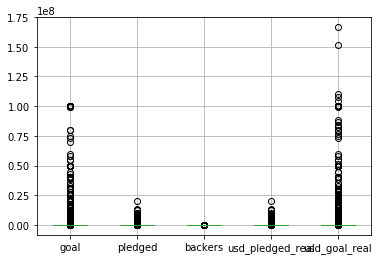

In [276]:
df.boxplot(df_colnum)

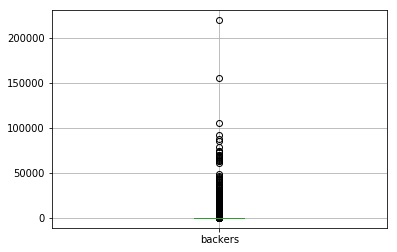

In [277]:
df.boxplot('backers')

Il y a beaucoup d'outliers pour chacune des valeurs. Les projets ont tous des buts, des nombres de donateurs et des montants différants. Les outliers ne sont donc pas des valeurs aberrantes et sont à prendre en compte.

## 4. Analyse univariée

### Succès
On veut prédire le succès ou non d'un projet, on s'intéresse donc aux résultats des crowdfundings : 

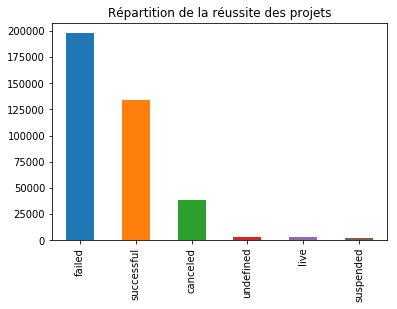

In [278]:
df.state.value_counts().plot.bar(title="Répartition de la réussite des projets")

In [279]:
print(df[df['state']== 'failed'].size/df.size*100,"% des projets n'ont pas aboutis.")
print(df[df['state']== 'successful'].size/df.size*100,"% des projets ont aboutis.")

52.21530603891079 % des projets n'ont pas aboutis.
35.37623362321443 % des projets ont aboutis.


<p><br\>

### Catégorie

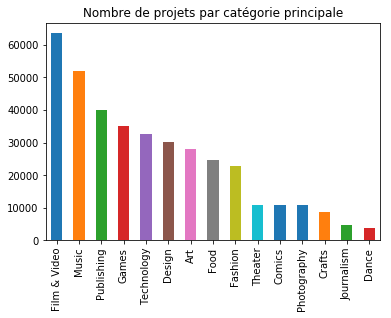

In [280]:
df.main_category.value_counts().plot.bar(title='Nombre de projets par catégorie principale')

In [281]:
print("Les 5 catégories de projets les plus courantes sont : ",df.main_category.value_counts().index.tolist()[0:5])

Les 5 catégories de projets les plus courantes sont :  ['Film & Video', 'Music', 'Publishing', 'Games', 'Technology']


<p><br\>
<p><br\>
    
### Currency

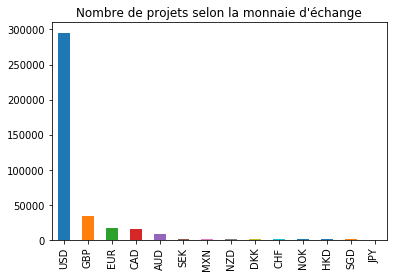

In [282]:
df.currency.value_counts().plot.bar(title="Nombre de projets selon la monnaie d'échange")

La plupart des projets sont financés en dollars américains. Viennent ensuite la livre sterling, l'euro et les dollars canadiens et australiens.
<p><br\>
<p><br\>

### Financement - but

In [283]:
print("Montant le plus demandé en dollars: ",df['usd_goal_real'].mode()[0])

Montant le plus demandé en dollars:  5000.0


In [284]:
print("Médianne des montants en dollars: ",df['usd_goal_real'].median())

Médianne des montants en dollars:  5500.0


In [285]:
print("Moyenne des montants en dollars: ",df['usd_goal_real'].mean())

Moyenne des montants en dollars:  45454.40146545336


In [286]:
print(df['usd_goal_real'][df['usd_goal_real']<5000].size/df['usd_goal_real'].size*100,"% des projets ont un but de financement inférieur à 5 000 dollars.")

42.943160240954306 % des projets ont un but de financement inférieur à 5 000 dollars.


In [287]:
print(df['usd_goal_real'][df['usd_goal_real']>5000].size/df['usd_goal_real'].size*100,"% des projets ont un but de financement supérieur à 5 000 dollars.")

50.67302943794053 % des projets ont un but de financement supérieur à 5 000 dollars.


**Répartition des projets dont le but de financement est inférieur à 5000 dollars**

Text(0.5,1,'Répartition des projets selon un montant inférieur à 5000 dollars')

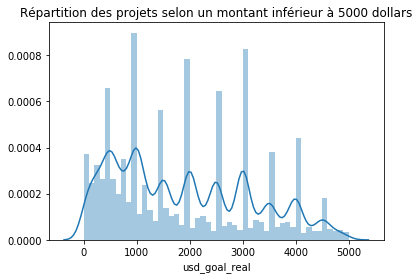

In [288]:
sns.distplot(df['usd_goal_real'][df['usd_goal_real']<5000])

plt.title("Répartition des projets selon un montant inférieur à 5000 dollars")

Text(0.5,1,'Répartition des projets selon un montant entre 5000 et 10000 dollars')

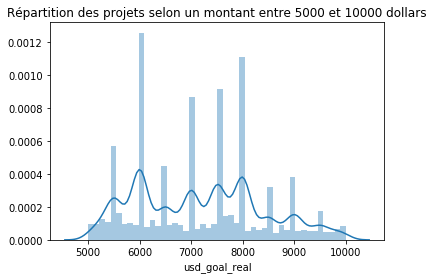

In [289]:
sns.distplot(df['usd_goal_real'][df['usd_goal_real']>5000][df['usd_goal_real']<10000])
plt.title("Répartition des projets selon un montant entre 5000 et 10000 dollars")

Text(0.5,1,'Répartition des projets selon un montant entre 10000 et 100000 dollars')

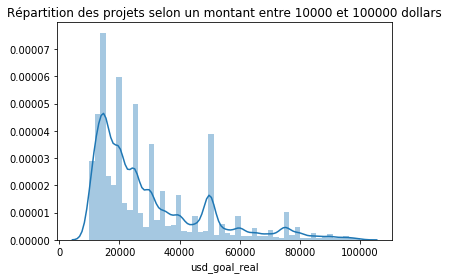

In [290]:
sns.distplot(df['usd_goal_real'][df['usd_goal_real']<100000][df['usd_goal_real']>10000])
plt.title("Répartition des projets selon un montant entre 10000 et 100000 dollars")

- Le montant le plus demandé est de 5 000 dollars. 
- La médiane est de 5500 dollars. 
- Beaucoup de projets demandent un montant rond, plutôt tous les 500 dollars.
<p><br\>

### Financement - obtenu

In [291]:
print("Montant le plus donné en dollars: ",df['usd_pledged_real'].mode()[0])

Montant le plus donné en dollars:  0.0


In [292]:
print("Médiane des dons en dollars: ",df['usd_pledged_real'].median())

Médiane des dons en dollars:  624.33


In [293]:
print("Moyenne des dons en dollars: ",df['usd_pledged_real'].mean())

Moyenne des dons en dollars:  9058.924074119337


In [294]:
print("Variance et écart-type des dons en dollars: ",df['usd_pledged_real'].var(),",",df['usd_pledged_real'].mean())

Variance et écart-type des dons en dollars:  8276149156.121636 , 9058.924074119337


Text(0.5,1,'Répartition des dons entre 0 et 100 en dollars')

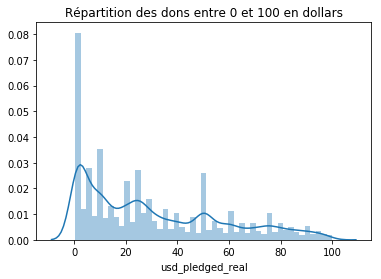

In [295]:
sns.distplot(df['usd_pledged_real'][df['usd_pledged_real']<100][df['usd_pledged_real']>0])
plt.title("Répartition des dons entre 0 et 100 en dollars")

In [296]:
print("Les valeurs varient énormément en fonction des projets mais les 10 montants les plus donnés sont : ",df.usd_pledged_real.value_counts().index.tolist()[1:11])

Les valeurs varient énormément en fonction des projets mais les 10 montants les plus donnés sont :  [1.0, 10.0, 25.0, 50.0, 5.0, 100.0, 20.0, 2.0, 30.0, 15.0]


### Pays donateurs

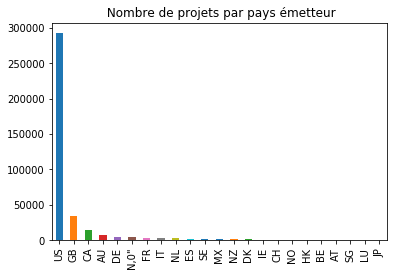

In [297]:
df.country.value_counts().plot.bar(title=" Nombre de projets par pays émetteur")

In [298]:
print("Les 5 pays avec le plus de donateurs sont : ",df.country.value_counts().index.tolist()[0:5])

Les 5 pays avec le plus de donateurs sont :  ['US', 'GB', 'CA', 'AU', 'DE']


Ce résultat rejoint assez celui de la variable currency. On peut donc choisir une de ces deux variables pour remplacer l'autre.

### Donateurs

In [299]:
df.backers.mode()

0    0
dtype: int64

Beaucoup de projets ne trouvent aucun donateurs.

In [300]:
df.backers.median()

12.0

La moitié des projets ont moins de 12 donateurs. 

In [301]:
print("Nombre de donateurs moyens : ",df.backers.mean())

Nombre de donateurs moyens :  105.61747578969052


**Positionnement du nombre de projets avec entre 12 et 1000 donateurs**

Text(0.5,1,'Positionnement du nombre de projets en fonctino du nombre de donateurs')

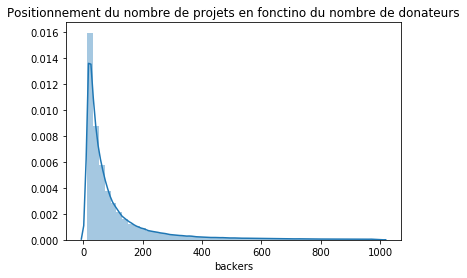

In [302]:
sns.distplot(df['backers'][df['backers']>12][df['backers']<1000])
plt.title("Positionnement du nombre de projets en fonctino du nombre de donateurs")

In [303]:
df['backers'].skew()

86.76300900921687

Coefficient d'asymétrie positif

## 5. Analyse multivarié

On utilie des valeurs numériques pour représenter le succès ou non d'un projet : 
- succès : 1
- échec : 0
- autre : -1

In [304]:
df['state_code'] = df['state'].str.replace("successful",'1').str.replace('failed','0').str.replace('canceled','-1').str.replace('live','-1').str.replace('undefined','-1').str.replace('suspended','-1')
df['state_code'] = pd.to_numeric(df['state_code'])

### Currency

Text(0.5,1,"Réussite des projets en fonction de la monnaie d'échange")

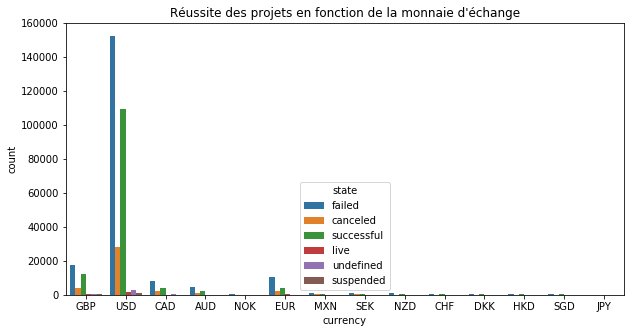

In [305]:
fig, axs = plt.subplots(figsize=(10,5))
sns.countplot(x="currency",hue="state",data = df)
plt.title("Réussite des projets en fonction de la monnaie d'échange")

Il y a plus de projets financés en dollars, et ceux là ont une plus grande proportion de réussite.
<p><br\>

### Nombre de donateurs

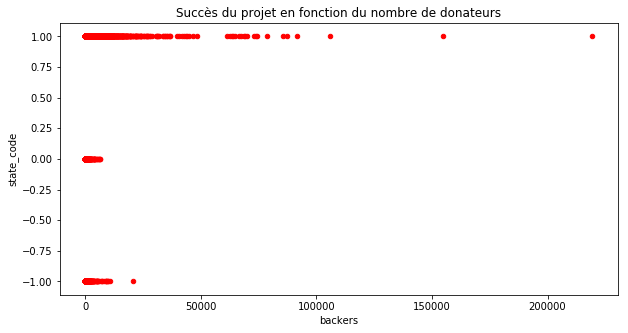

In [306]:
df.plot.scatter(title='Succès du projet en fonction du nombre de donateurs',x='backers',y='state_code',c='red',figsize=(10,5))

Les projets avec un grand nombre de donateurs ont tous aboutis.
<p><br\>

### Montant des dons

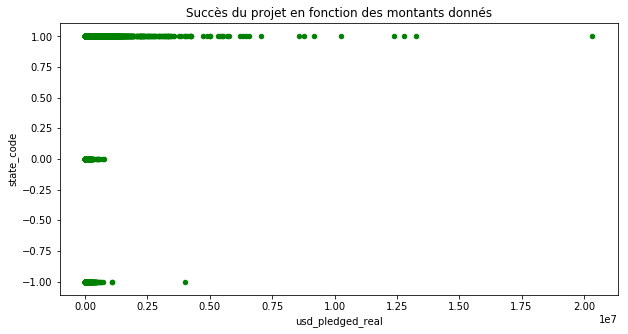

In [307]:
df.plot.scatter(title='Succès du projet en fonction des montants donnés',x='usd_pledged_real',y='state_code',c='green',figsize=(10,5))


De même que pour le nombre de donateurs, le montant des dons récoltés influence positivement la réussite d'un projet.
<p><br\>

### Montant demandé

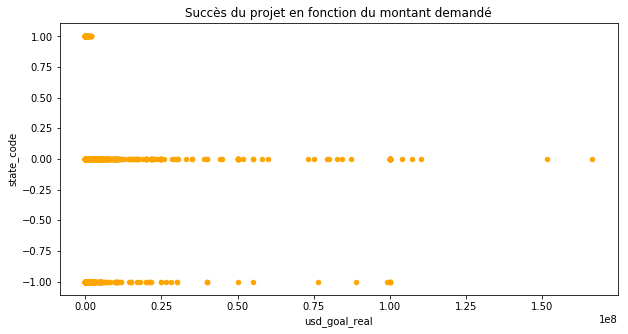

In [308]:
df.plot.scatter(title='Succès du projet en fonction du montant demandé',x='usd_goal_real',y='state_code',c='orange',figsize=(10,5))



Corrélation faible entre le montant demandé et le succès du projet. La plupart des projets ayant aboutis sont moins onéreux que les autres.
<p><br\>

### Catégorie du projet

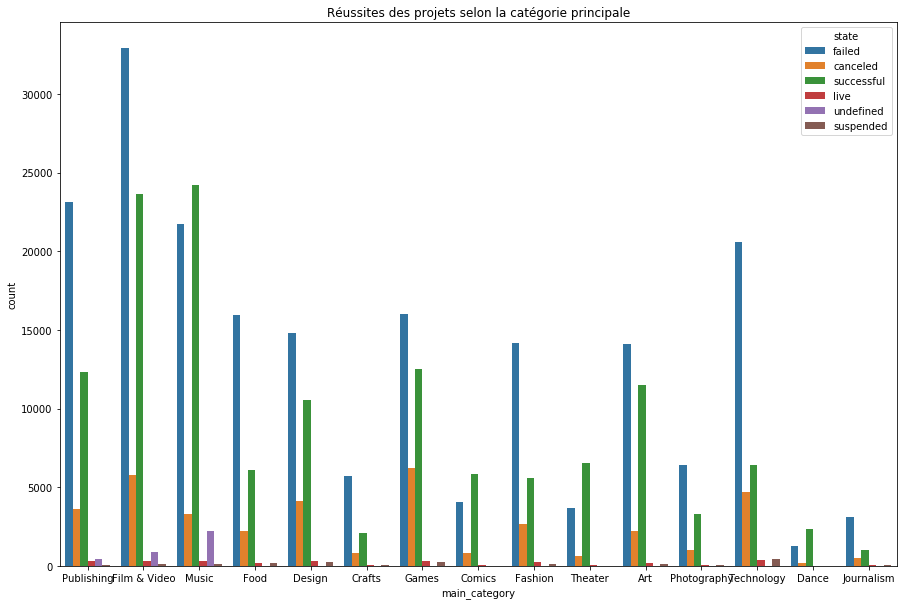

In [309]:
fig, axs = plt.subplots(figsize=(15,10))
plt.title("Réussites des projets selon la catégorie principale")
sns.countplot(x='main_category', data=df, hue='state')

Les projets les plus susceptibles de réussir sont les films, les publications, la musique et les projets technologiques.
<p><br\>

### Temps de récolte

On se demande si la limite de temps avant la fin d'une récolte influe sur la réussite d'un projet.

In [310]:
from datetime import date

In [311]:
# Conversion des string en format datetime

ldlaunched = []

for dl in df['launched'].values :
    listd = dl.split('-')
    listd[2] = listd[2].split(' ')[0]
    dlaunched = date(int(listd[0]),int(listd[1]),int(listd[2]))
    ldlaunched.append(dlaunched)
    
lddeadl = []    
for dd in df['deadline'].values :
    listd = dd.split('-')
    listd[2] = listd[2].split(' ')[0]
    ddeadl = date(int(listd[0]),int(listd[1]),int(listd[2]))
    lddeadl.append(ddeadl)

In [312]:
# On crée une liste des durées de campagne (deadline - launched) en jour. 

ldate = []
for i in range(len(lddeadl)):
    ldate.append((lddeadl[i] - ldlaunched[i]).days)

In [313]:
# Ajout de la colonne au dataframe (int)
df['time'] = ldate

In [314]:
df['time'][0:5]

ID
1000002330    59
1000003930    60
1000004038    45
1000007540    30
1000011046    56
Name: time, dtype: int64

In [315]:
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,state_code,time
ID,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,59
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,60
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,45
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,30
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,-1,56


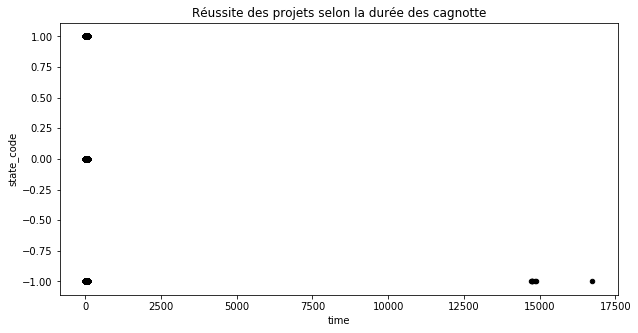

In [316]:
df.plot.scatter(x='time',y='state_code',figsize=(10,5),c='black',title='Réussite des projets selon la durée des cagnotte')

In [317]:
df['time'].mode()[0]

30

In [318]:
df['time'].median()

30.0

In [319]:
df['time'].mean()

34.481095227657455

**Les limites de temps semblent tourner autour de 30 jours. Pour plus de précisison on s'intéresse alors uniquements aux projets avec une limite inférieure à 100 jours.**

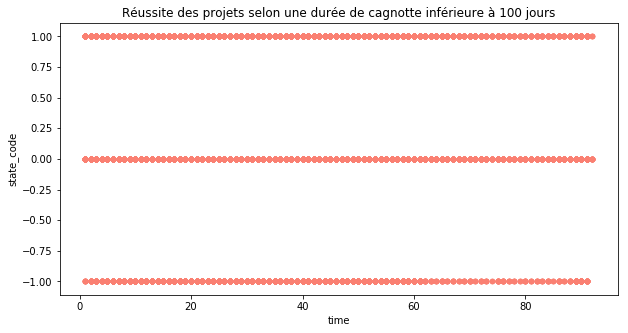

In [320]:
df[df['time'] < 100].plot.scatter(x='time',y='state_code',figsize=(10,5),c='salmon',title='Réussite des projets selon une durée de cagnotte inférieure à 100 jours')

La limite de temps n'influe donc aucunement sur la réussite d'un projet.
<p><br\>

### Corrélations

In [321]:
df2 = df.drop(['name','main_category','category','deadline', 'goal','state','launched', 'pledged','usd pledged'],axis=1)

Text(0.5,1,'Graphes des corrélations entre les variables')

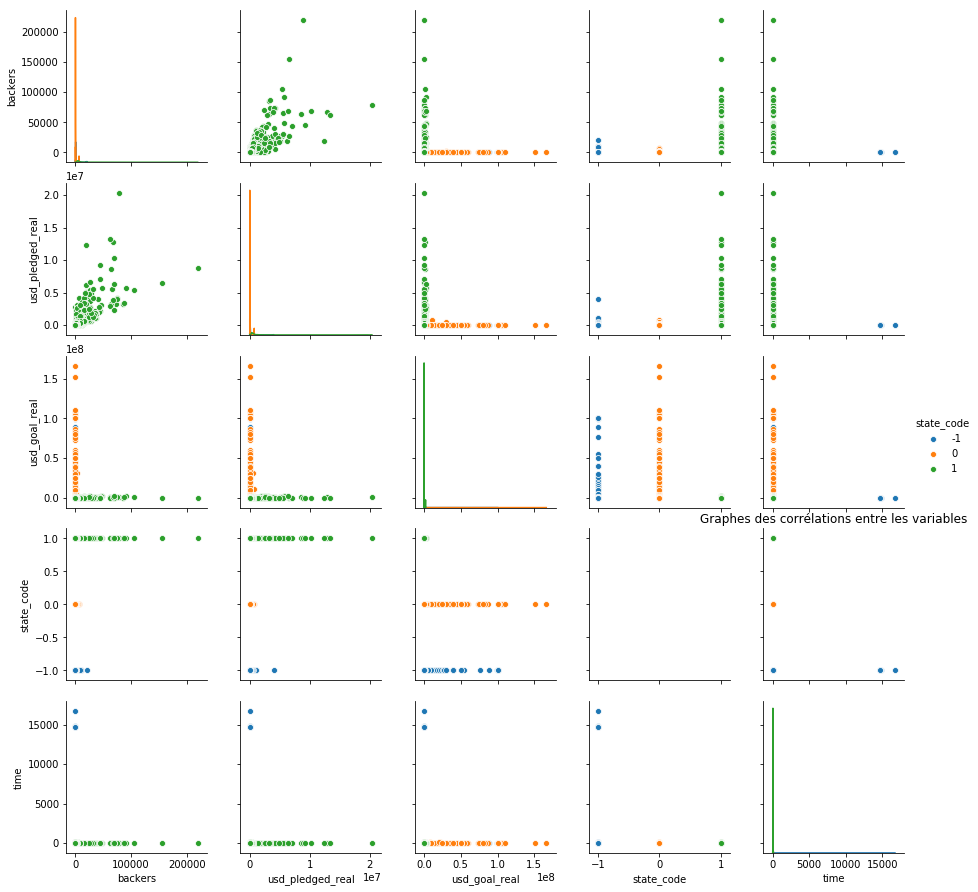

In [322]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df2,hue="state_code")
plt.title("Graphes des corrélations entre les variables")

In [323]:
df.corr()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,state_code,time
goal,1.000000,0.007358,0.004012,0.005534,0.005104,0.942692,-0.023326,0.004321
pledged,0.007358,1.000000,0.717079,0.857370,0.952843,0.005024,0.094450,0.000847
backers,0.004012,0.717079,1.000000,0.697426,0.752539,0.004517,0.110622,-0.000792
usd pledged,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172,0.084080,0.000771
usd_pledged_real,0.005104,0.952843,0.752539,0.907743,1.000000,0.005596,0.094247,0.000946
usd_goal_real,0.942692,0.005024,0.004517,0.006172,0.005596,1.000000,-0.021501,0.004184
state_code,-0.023326,0.094450,0.110622,0.084080,0.094247,-0.021501,1.000000,-0.029863
time,0.004321,0.000847,-0.000792,0.000771,0.000946,0.004184,-0.029863,1.000000


Text(0.5,1,'Heatmap des corrélations entre les variables')

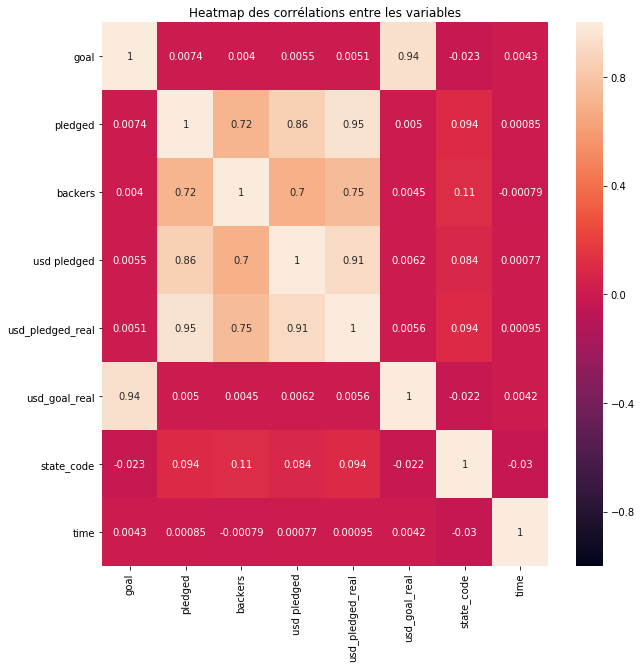

In [324]:
fig, axs = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1)
plt.title("Heatmap des corrélations entre les variables")

Les deux graphiques montrent bien la faible corrélation entre le succès d'un projet et les autres données.
<p><br\>

## 6. Conclusion

Le taux de réussite des projets de crowdfunding est faible (35%). Il est donc plus difficile de trouver des corrélations entre les variables. 
On remarque tout de même que des projets avec certaines caractéristques peuvent avoir plus de succès : 
- Les projets qui viennent des US,
- Ceux qui rassemblent plus de donateurs,
- Si un montant important est récolté,
- Les projets de film ou vidéo, littérature, musique ou technologie (mais ce sont aussi les projets les plus nombreux).